In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
data_abb = pd.read_csv('clean_listings.csv')

In [16]:

# data_abb['price'] = data_abb['price'].str.replace(',', '').str.replace('$', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [10]:
# data_abb = data_abb.astype({"price": int})

ValueError: invalid literal for int() with base 10: '$3,000.00'

In [18]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
data_abb=data_abb[data_abb.price>=0]
data_abb=data_abb[data_abb.availability_365>=0]


In [19]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
data_abb=data_abb[data_abb.price>0]
data_abb=data_abb[data_abb.availability_365>0]

In [21]:
data_abb.neighbourhood_cleansed.value_counts()

Venice                      1829
Hollywood                   1731
Long Beach                   980
Santa Monica                 822
Downtown                     809
                            ... 
Vernon                         1
Harvard Park                   1
South San Jose Hills           1
West Whittier-Los Nietos       1
Citrus                         1
Name: neighbourhood_cleansed, Length: 254, dtype: int64

In [22]:
data_abb.describe()

,Unnamed: 0,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
count,27242.000000,2.724200e+04,2.724200e+04,27232.000000,0.0,27242.000000,27242.000000,27242.000000,27242.000000,27242.000000,27242.000000,21719.000000
mean,15618.680457,1.099439e+07,3.699345e+07,5.635539,NaN,34.055909,-118.332889,184.175831,3.186110,228.703032,23.264628,1.996160
std,9039.678867,5.648072e+06,3.524591e+07,25.039913,NaN,0.103429,0.157946,430.892580,8.107919,123.727330,39.891308,2.059089
min,0.000000,9.410000e+02,5.900000e+01,0.000000,NaN,33.338905,-118.911026,10.000000,1.000000,1.000000,0.000000,0.020000
25%,7779.250000,6.153812e+06,7.394917e+06,1.000000,NaN,34.010602,-118.432171,69.000000,1.000000,99.000000,1.000000,0.510000
50%,15625.500000,1.254364e+07,2.490376e+07,2.000000,NaN,34.066142,-118.349108,100.000000,2.000000,271.500000,8.000000,1.300000
75%,23429.750000,1.593299e+07,5.807848e+07,4.000000,NaN,34.104219,-118.265529,175.000000,3.000000,350.000000,28.000000,2.930000
max,31252.000000,1.852404e+07,1.285513e+08,855.000000,NaN,34.742088,-117.655471,10000.000000,365.000000,365.000000,605.000000,90.000000


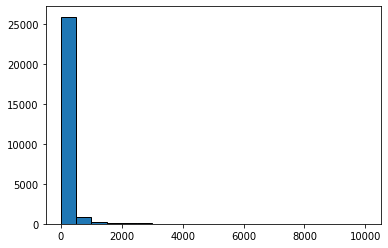

In [23]:
bins = [x for x in range(0,10500,500)]
plt.hist(data_abb['price'].values, bins=bins, edgecolor="k")


plt.show()

In [27]:
# Setting the target variable and independent variable
X=['minimum_nights','number_of_reviews','availability_365','room_type','neighbourhood_cleansed']
y='price'

In [28]:
data_X=data_abb[X]
data_y=data_abb[y]
data_X.head()
print(data_X.shape)
print(data_y.shape)

(27242, 5)
(27242,)


In [29]:
# encoding the categorical data for making data suitable for machine to learn
X=pd.get_dummies(data_X,prefix_sep='_',drop_first=True)
X.shape

(27242, 258)

In [30]:
X.head()

,minimum_nights,number_of_reviews,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Adams-Normandie,neighbourhood_cleansed_Agoura Hills,neighbourhood_cleansed_Agua Dulce,neighbourhood_cleansed_Alhambra,neighbourhood_cleansed_Alondra Park,...,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Westlake Village,neighbourhood_cleansed_Westmont,neighbourhood_cleansed_Westwood,neighbourhood_cleansed_Whittier,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Wilmington,neighbourhood_cleansed_Windsor Square,neighbourhood_cleansed_Winnetka,neighbourhood_cleansed_Woodland Hills
0,1,0,352,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,33,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,14,348,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,22,87,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,32,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# ML


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.25,random_state=1)

In [32]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.9902477658655254

        Mean Squared Error: 365.7747488571547
        R2 Score: 13.301818096274031
        Mean Absolute Error: 118.34941563670465
     
